## 1 - Packages
Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [28]:
#import time
import numpy as np
#import h5py
import matplotlib.pyplot as plt
import scipy
#from PIL import Image
#from scipy import ndimage
import pandas as pd
import seaborn as sns # Pairplot
from dnn_app_utils_v3 import *

#np.random.seed(1)

## 2 - Dataset

In [123]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

df_all = pd.DataFrame()
df_all = pd.read_csv('./data/180724_LBS test_2st_ANTM_all_plus_leftright_012367.csv', encoding='CP949')
df_all.columns = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7', 'Distance', 'Angle']

#df_000.head()
df_all.tail()
#print(df.head())
#print(df.tail())

,ANTM Main,ANTM Sub1,ANTM Sub2,ANTM Sub3,ANTM Sub6,ANTM Sub7,Distance,Angle
1195,78,76,81,86,80,80,2m,1
1196,78,75,81,85,80,79,2m,1
1197,78,75,81,84,81,78,2m,1
1198,78,75,80,83,81,76,2m,1
1199,78,75,80,82,81,75,2m,1


In [124]:
cols_Module = ['ANTM Main', 'ANTM Sub1', 'ANTM Sub2', 'ANTM Sub3', 'ANTM Sub6', 'ANTM Sub7']
cols_Angle = ['Angle']


X = df_all[cols_Module]
y = df_all[cols_Angle]

print(X.head())
print(X.tail())
print(y.head())
print(y.tail())

   ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
0         71         75         71         82         77         72
1         71         75         72         82         76         72
2         70         75         72         82         76         72
3         70         75         72         82         76         72
4         70         76         72         82         76         72
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1195         78         76         81         86         80         80
1196         78         75         81         85         80         79
1197         78         75         81         84         81         78
1198         78         75         80         83         81         76
1199         78         75         80         82         81         75
   Angle
0      0
1      0
2      0
3      0
4      0
      Angle
1195      1
1196      1
1197      1
1198      1
1199      1


In [125]:
# arrays : 데이터
# test_size : 테스트 데이터 사이즈
# train_size : 사이즈
# random_state : 난수 시드

# 사이트 참고
# https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

# 데이터 변환 사이트 참고
# http://rfriend.tistory.com/tag/XY%EC%B6%95%20%ED%98%95%ED%83%9C%20%EB%B3%80%ED%99%98
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print(X_train.head())
print(X_train.tail())
print(X_test.head())
print(X_test.tail())

print(y_train.head())
print(y_train.tail())
print(y_test.head())
print(y_test.tail())

      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
533          77         77         71         67         78         78
903          78         76         72         77         73         71
1003         72         78         87         83         75         80
1069         73         80         87         83         85         80
413          78         68         66         56         84         77
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1044         74         78         79         84         80         79
1095         73         76         84         86         80         83
1130         76         77         80         89         82         79
860          68         75         69         82         67         60
1126         77         78         78         87         81         78
      ANTM Main  ANTM Sub1  ANTM Sub2  ANTM Sub3  ANTM Sub6  ANTM Sub7
1178         77         75         80         87         78         77
865   

In [126]:
# Explore your dataset 
# X_train, X_test, y_train, y_test

# X_train, X_test가 예제와 다른 것이 아니다
# 예제에서 두 데이터의 shape가 바뀌는 부분이 이곳에 통합되었다.
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

y_train = np.transpose(y_train)
y_test = np.transpose(y_test)

In [127]:
m_train = X_train.shape[1]
m_test = X_test.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_x shape: " + str(X_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x shape: " + str(X_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 1080
Number of testing examples: 120
train_x shape: (6, 1080)
train_y shape: (1, 1080)
test_x shape: (6, 120)
test_y shape: (1, 120)


In [129]:
# X_train, X_test, y_train, y_test
train_x = np.array(X_train)
test_x = np.array(X_test)
train_y = np.array(y_train)
test_y = np.array(y_test)

test_y

array([[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 0]], dtype=int64)

## 3 - Architecture of your model

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [130]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 6
n_h = 6
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [165]:
# GRADED FUNCTION: two_layer_model
# default : learning_rate = 0.0075

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 5000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 500 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 500 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    
    return parameters

Cost after iteration 0: 0.6930504930135379
Cost after iteration 500: 0.6262937378133862
Cost after iteration 1000: 0.5548837231567537
Cost after iteration 1500: 0.48411365151096025
Cost after iteration 2000: 0.45637109817849636
Cost after iteration 2500: 0.41974364902962685
Cost after iteration 3000: 0.3925288941765422
Cost after iteration 3500: 0.37117060251506956
Cost after iteration 4000: 0.3500996260356842
Cost after iteration 4500: 0.3313049570040392
Cost after iteration 5000: 0.3318029130401812
Cost after iteration 5500: 0.3255405505120985
Cost after iteration 6000: 0.32506500762209156
Cost after iteration 6500: 0.30726413468052904
Cost after iteration 7000: 0.290285052535925
Cost after iteration 7500: 0.2817491224115251
Cost after iteration 8000: 0.2761179566798707
Cost after iteration 8500: 0.2642375277648698
Cost after iteration 9000: 0.2544061489798993
Cost after iteration 9500: 0.2550688570845524


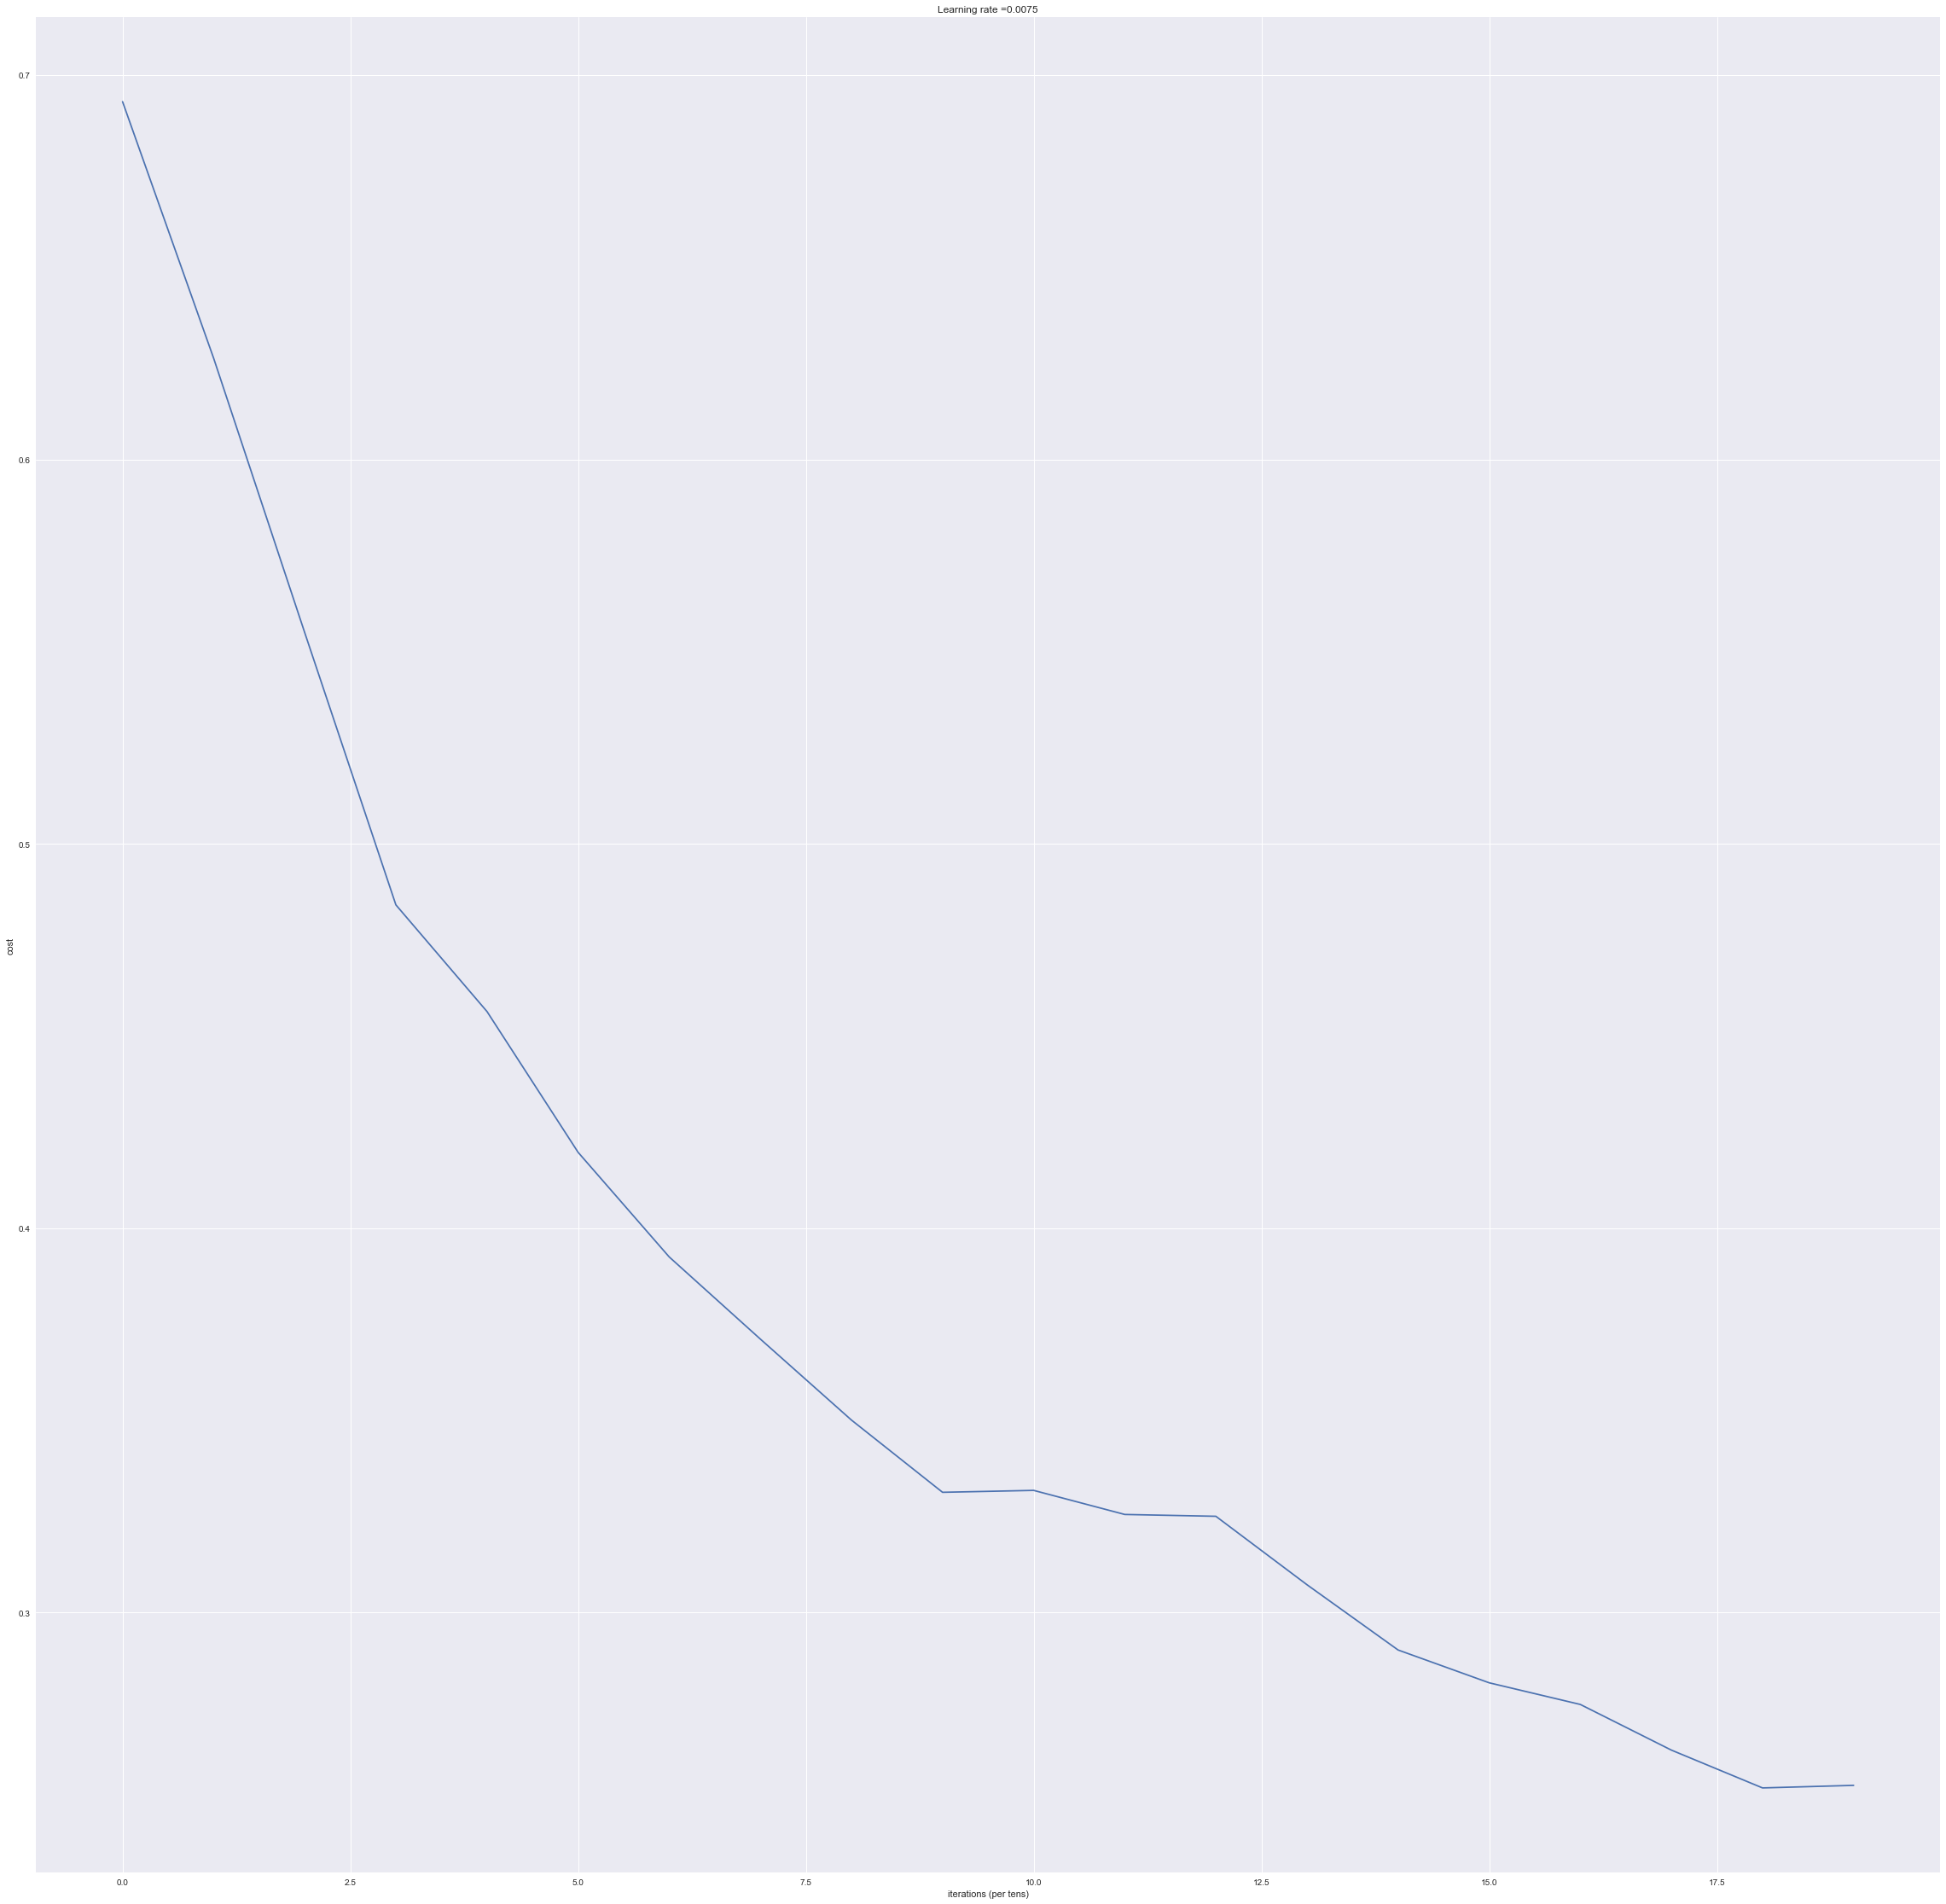

Cost after iteration 9999: 0.2446974729199109


In [166]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 10000, print_cost=True)

In [163]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.881481481481


In [135]:
print(train_x.shape)
print(train_x)
print(train_y.shape)
print(train_y)

(6, 1080)
[[77 78 72 ..., 76 68 77]
 [77 76 78 ..., 77 75 78]
 [71 72 87 ..., 80 69 78]
 [67 77 83 ..., 89 82 87]
 [78 73 75 ..., 82 67 81]
 [78 71 80 ..., 79 60 78]]
(1, 1080)
[[0 1 1 ..., 1 1 1]]


In [88]:
m = train_x.shape[1]      # 1440
n = len(parameters) // 2  # 2, # number of layers in the neural network
p = np.zeros((1,m))       # (1,1440) zero 벡터
    
# Forward propagation
probas, caches = L_model_forward(train_x, parameters)
# probas : (1,1440)
# caches : 여러개의 배열

In [94]:
# convert probas to 0/1 predictions
for i in range(0, probas.shape[1]):
    if probas[0,i] > 0.5:
        p[0,i] = 1
    else:
        p[0,i] = 0

In [96]:
probas

array([[ 0.55824373,  0.55616118,  0.55776496, ...,  0.55413171,
         0.56169   ,  0.55694522]])

In [136]:
#print results
#print ("predictions: " + str(p))
#print ("true labels: " + str(y))
print("Accuracy: "  + str(np.sum((p == train_y)/m)))

Accuracy: 0.0


C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [164]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.883333333333


## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [41]:
### CONSTANTS ###
#layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
layers_dims = [8, 20, 7, 5, 1] #  4-layer model

In [47]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0005, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters

Cost after iteration 0: 242.407264
Cost after iteration 10: 0.645665
Cost after iteration 20: 0.599728
Cost after iteration 30: 0.553905
Cost after iteration 40: 0.508196
Cost after iteration 50: 0.462602
Cost after iteration 60: 0.417121
Cost after iteration 70: 0.371753
Cost after iteration 80: 0.326498
Cost after iteration 90: 0.281356
Cost after iteration 100: 0.236327
Cost after iteration 110: 0.191409
Cost after iteration 120: 0.146602
Cost after iteration 130: 0.101906
Cost after iteration 140: 0.057321


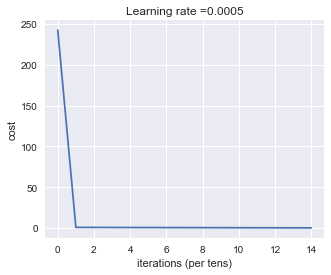

Cost after iteration 149: 0.017289


In [48]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 150, print_cost = True)

In [57]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.119444444444


In [55]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.175
